# <center>Методы борьбы с переобучением
## Уменьшение сложности модели
Это основной способ борьбы с переобучением, так как, по сути, повышенная сложность модели и является его причиной.
* Для **линейной (логистической) регрессии** с полиномиальными признаками уменьшение сложности модели означает понижение степени полинома.

    Ниже приведены три полиномиальных модели, которые решают одну и ту же задачу, — полином первой (простая линейная регрессия), четвёртой и пятнадцатой степени. Для каждой модели рассчитана MSE (средний квадрат ошибки) между предсказанными значениями и истинной функцией. Видно, что наименьшей ошибкой обладает полином четвёртой степени.

    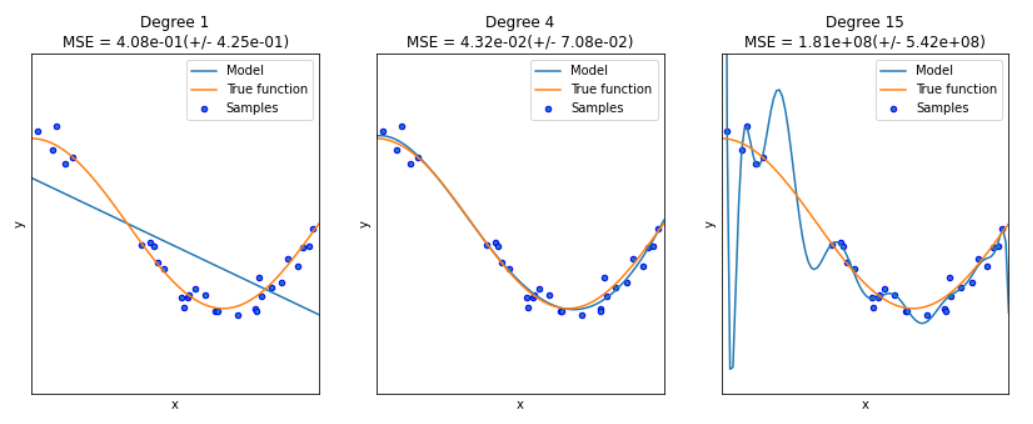
* Для **деревьев решений** — «стрижка» (*pruning*) деревьев, то есть уменьшение их глубины (`max_depth`) и/или увеличение количества объектов, при которых вершина дерева превращается в лист (`min_samples_leaf`).

    Пример переобученного дерева решений и его разделяющей поверхности до обрезки:

    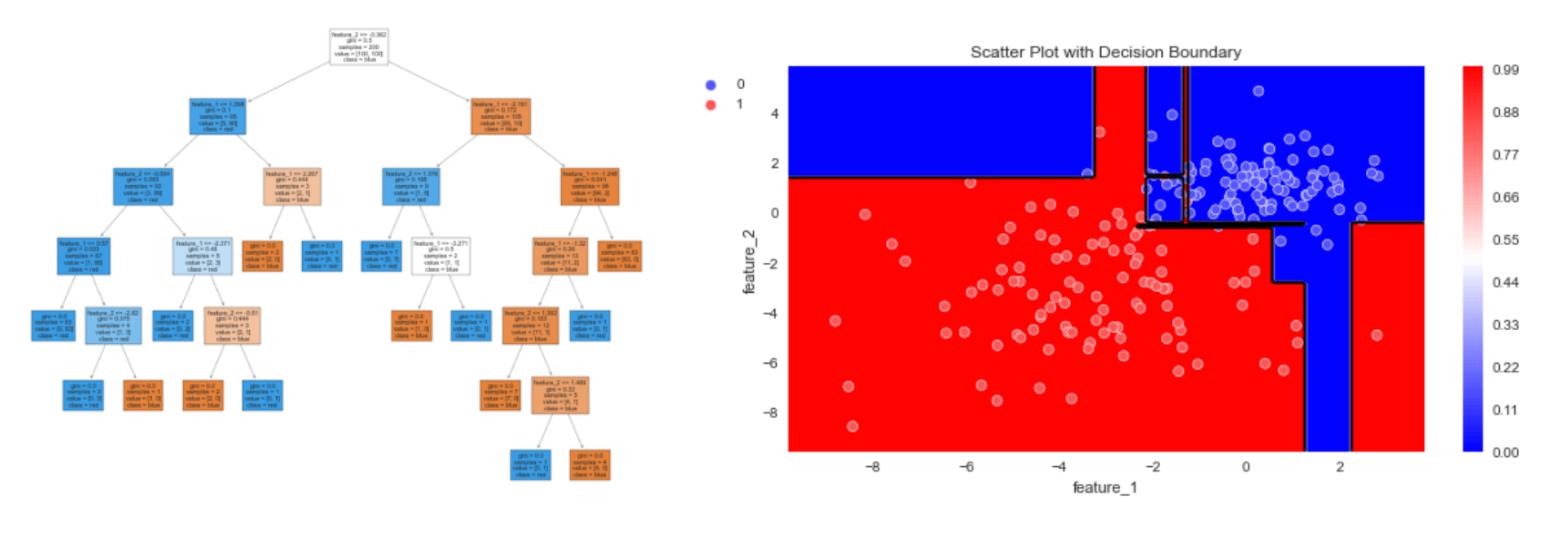

    После обрезки (`max_depth=3, min_samples_leaf=5`):

    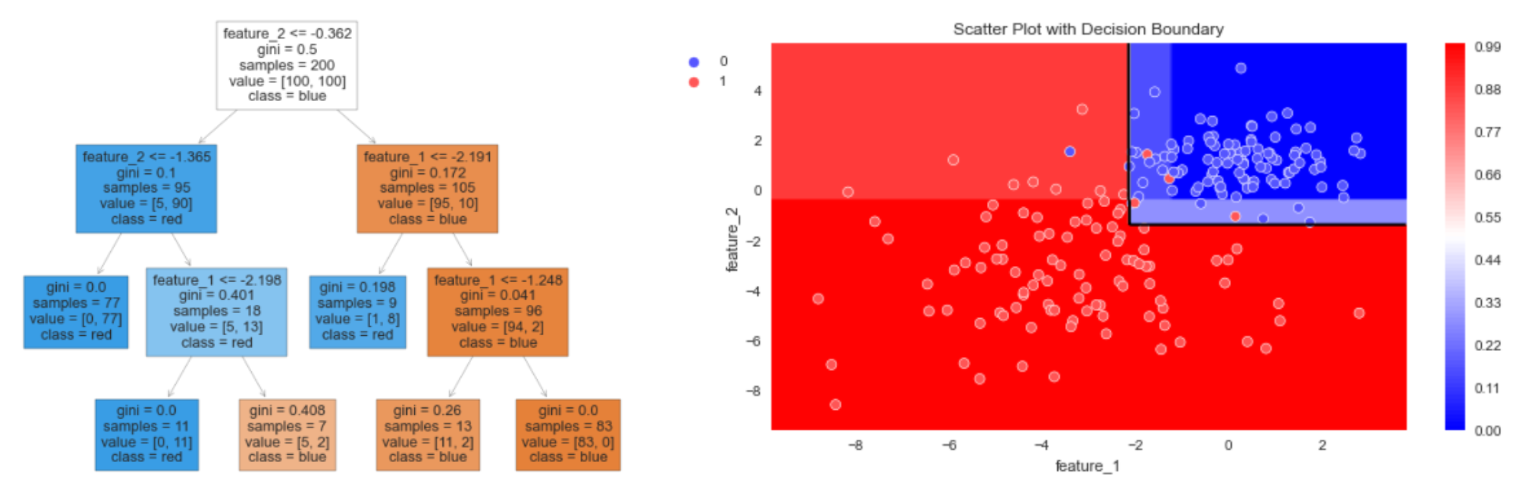
* Для **случайного леса** — «стрижка» деревьев (`max_depth` и `min_samples_leaf`) и уменьшение количества признаков, на которых обучается каждое дерево (`max_features`).
## Регуляризация
С помощью добавления штрафа в функцию потерь мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс.

Ранее мы изучали регуляризацию только в контексте линейных моделей, но на самом деле она есть и во многих других методах машинного обучения, с которыми мы будем знакомиться в дальнейшем.

На рисунке ниже приведено несколько примеров одной и той же модели — полинома восьмой степени с различными коэффициентами регуляризации (обозначен как $\lambda$). Видно, что чем выше $\lambda$, тем меньше переобучение. Однако есть риск увеличить $\lambda$ слишком сильно, и тогда модель превратится в недообученную (правый нижний рисунок).

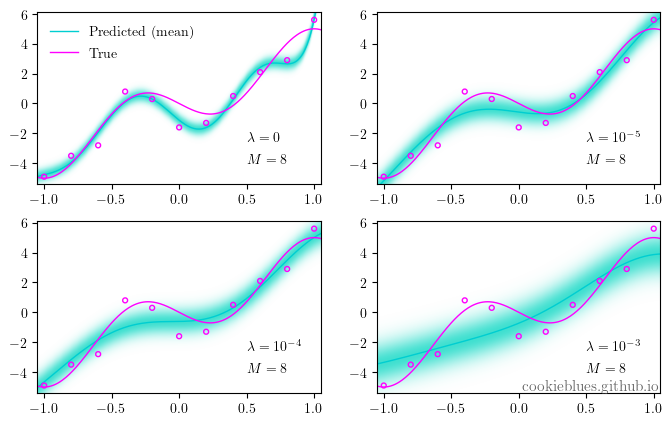
## Манипуляции с данными
Ещё один верный способ побороть переобучение — увеличить или уменьшить количество примеров, на которых обучается модель.
* Увеличивать набор данных можно за счёт проведения новых экспериментов и сбора новой информации.
* Уменьшать набор данных можно за счёт удаления выбросов и аномалий из обучающего набора данных, из-за которых отчасти и происходит переобучение модели.
Также можно отбирать наиболее значимые признаки, которые в наибольшей степени влияют на предсказания модели.

# <center>Утечка данных
>**Утечка данных (data leak)** — это ситуация, в которой данные, используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной.

Приведём несколько примеров, когда может возникнуть утечка данных:
1. **Очевидные случаи**
    * Наиболее очевидной ситуацией утечки данных является **включение целевой переменной**, которую мы пытаемся предсказать, **в качестве фактора**, что полностью уничтожает цель «прогнозирования». Это может быть сделано по ошибке, но важно убедиться, что целевая переменная отличается от признаков.
    * Другой распространённой причиной утечки данных является **включение тестовых данных в данные по обучению** модели, а затем **использование этих же тестовых данных для оценки качества** модели.
2. **Скрытые случаи / Giveaway-признаки**
    >**Giveaway** — это признаки, которые раскрывают информацию о целевой переменной и не будут доступны после развёртывания модели в реальных условиях. Такие признаки необходимо удалять из данных перед построением модели.

    <font color=lightpink>Из-за утечки данных прогноз модели становится очень оптимистичным. Вы получаете потрясающее качество во время обучения модели, радуетесь сами и радуете своего заказчика. Однако когда дело доходит до использования модели в реальных условиях, оказывается, что у вас **недостаточно данных для построения прогноза**.</font>

**Как обнаружить утечку данных**
* Читайте описание признаков.
* Проверяйте корреляции с целевым признаком.
* Относитесь скептически к подозрительно высокому качеству моделей.
